In [1]:
pip install diffusers torch torchvision transformers pillow accelerate


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from diffusers import StableDiffusionPipeline
import os
from PIL import Image

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Define output directory for generated images
output_dir = "../images"
os.makedirs(output_dir, exist_ok=True)

In [4]:
# Load Stable Diffusion Pipeline
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.03it/s]


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [6]:
# Define a creative text prompt
prompt = "a serene sunset over a futuristic city"


In [7]:
# Generate multiple images
num_images = 3
generated_images = []

for i in range(num_images):
    image = pipeline(prompt).images[0]  # Generate image
    image_path = os.path.join(output_dir, f"generated_{i+1}.png")
    image.save(image_path)
    generated_images.append(image_path)
    print(f"Image saved: {image_path}")

100%|██████████| 50/50 [02:42<00:00,  3.25s/it]


Image saved: ../images/generated_1.png


100%|██████████| 50/50 [02:49<00:00,  3.39s/it]


Image saved: ../images/generated_2.png


100%|██████████| 50/50 [02:23<00:00,  2.88s/it]


Image saved: ../images/generated_3.png


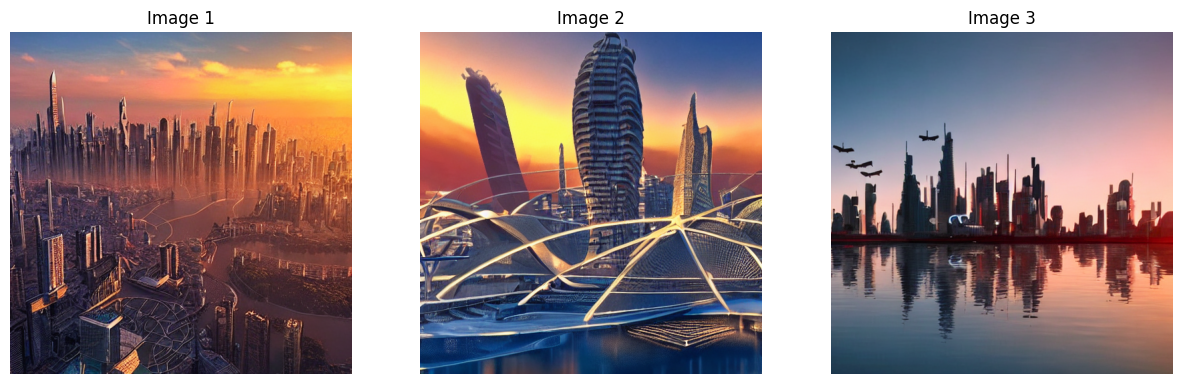

In [8]:
import matplotlib.pyplot as plt

# Display the generated images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, img_path in enumerate(generated_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

plt.show()